In [14]:
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy
import pandas as pd

In [15]:
from surprise import Dataset, Reader

# Load the built-in MovieLens 100k dataset
data = Dataset.load_builtin('ml-100k')

# Convert dataset to a trainset format
trainset = data.build_full_trainset()

In [16]:
from surprise import KNNBasic

sim_options = {'name': 'cosine', 'user_based': True}
model = KNNBasic(sim_options=sim_options)

# Train the model
model.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [17]:
##### Get Similar Users
# Example: Get top 5 similar users to User 196
user_inner_id = trainset.to_inner_uid('196')  # Convert raw user ID to internal ID
neighbors = model.get_neighbors(user_inner_id, k=5)  # Get 5 nearest neighbors

# Convert internal user IDs back to original user IDs
neighbors_real_ids = [trainset.to_raw_uid(inner_id) for inner_id in neighbors]

print(f"Top 5 similar users to User 196: {neighbors_real_ids}")

Top 5 similar users to User 196: ['166', '50', '225', '20', '241']


In [18]:
##### View Similarity Matrix
import numpy as np

# Access similarity matrix
similarity_matrix = model.sim

# Convert to numpy array for visualization
sim_array = np.array(similarity_matrix)

# Print a sample of the similarity matrix
print("User Similarity Matrix (first 5 rows and columns):\n", sim_array[:5, :5])

User Similarity Matrix (first 5 rows and columns):
 [[1.         0.87278605 0.91226401 0.97095216 1.        ]
 [0.87278605 1.         0.84761034 0.83621765 0.9260498 ]
 [0.91226401 0.84761034 1.         0.90068113 0.86248336]
 [0.97095216 0.83621765 0.90068113 1.         0.99951208]
 [1.         0.9260498  0.86248336 0.99951208 1.        ]]


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0630
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0338
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0246
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0222
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9012


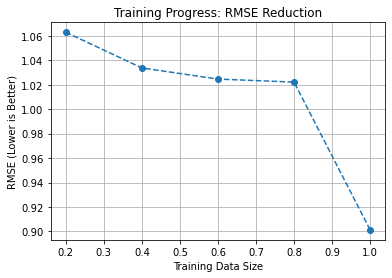

In [19]:
### Plot RMSE During Training
import matplotlib.pyplot as plt
from surprise.model_selection import train_test_split
from surprise import accuracy

train_sizes = [0.2, 0.4, 0.6, 0.8, 1.0]  # Different training data sizes
rmse_scores = []

for size in train_sizes:
    if size == 1.0:
        trainset = data.build_full_trainset()  # Use all data for training
        testset = trainset.build_testset()  # Use trainset for evaluation
    else:
        trainset, testset = train_test_split(data, test_size=1-size)
    
    model.fit(trainset)
    predictions = model.test(testset)
    rmse = accuracy.rmse(predictions)
    rmse_scores.append(rmse)

# Plot RMSE reduction
plt.plot(train_sizes, rmse_scores, marker='o', linestyle='--')
plt.xlabel("Training Data Size")
plt.ylabel("RMSE (Lower is Better)")
plt.title("Training Progress: RMSE Reduction")
plt.grid()
plt.show()

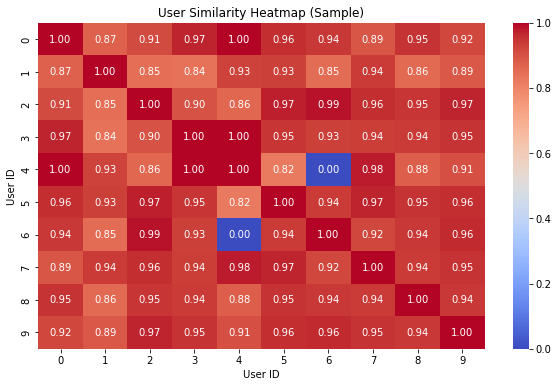

In [20]:
### Visualize the User Similarity Matrix
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(sim_array[:10, :10], cmap='coolwarm', annot=True, fmt=".2f")
plt.title("User Similarity Heatmap (Sample)")
plt.xlabel("User ID")
plt.ylabel("User ID")
plt.show()

In [21]:
# Predict rating for User ID = 196, Movie ID = 242
pred = model.predict(uid='196', iid='242')
print(f"Predicted rating: {pred.est}")

Predicted rating: 4.144829856960016
